<a href="https://colab.research.google.com/github/zwubbena/sample-size-tables/blob/main/moe_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

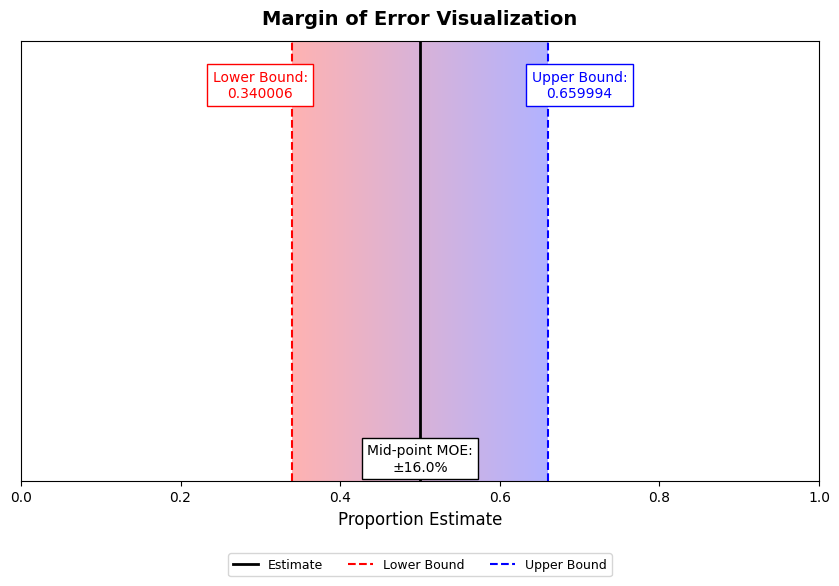

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==============================================
# Margin of Error Visualization (Two-Page PDF)
# Page 1: Chart
# Page 2: Interpretation (bold headers & spacing)
# - Inline display of Page 1
# - Auto-export as PDF
# ==============================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.backends.backend_pdf import PdfPages
from google.colab import files

# --------- Parameters (edit if needed) ---------
estimate = 0.50          # center estimate (p-hat)
moe = 0.159994           # margin of error (decimal) ~ ±16%
lower_bound = estimate - moe
upper_bound = estimate + moe
pdf_name = "MOE_Visualization_Two_Pages.pdf"
# -----------------------------------------------

# ---- Helper: red→blue horizontal gradient fill ----
def add_horizontal_gradient(ax, x0, x1, alpha=0.30, n=300):
    y0, y1 = ax.get_ylim()
    xs = np.linspace(x0, x1, n + 1)
    quads, colors = [], []
    for i in range(n):
        quads.append([(xs[i], y0), (xs[i+1], y0), (xs[i+1], y1), (xs[i], y1)])
        t = i / (n - 1) if n > 1 else 0.0  # 0→1
        colors.append((1.0 - t, 0.0, t, alpha))  # (R,G,B,alpha): red→blue
    pc = PolyCollection(quads, facecolors=colors, edgecolors='none', zorder=0.5)
    ax.add_collection(pc)

# ---------------------- Create PDF ----------------------
with PdfPages(pdf_name) as pdf:

    # ======================
    # Page 1 — Chart
    # ======================
    fig1, ax = plt.subplots(figsize=(8.5, 6))

    # Chart limits before gradient
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Gradient shading between bounds
    add_horizontal_gradient(ax, lower_bound, upper_bound, alpha=0.30)

    # Vertical lines
    ax.axvline(estimate,    color='black', linewidth=2, label='Estimate')
    ax.axvline(lower_bound, color='red',   linestyle='--', label='Lower Bound')
    ax.axvline(upper_bound, color='blue',  linestyle='--', label='Upper Bound')

    # Value labels, shifted away from dashed lines
    ax.text(lower_bound - 0.04, 0.90, f"Lower Bound:\n{lower_bound:.6f}", color='red',
            ha='center', va='center', bbox=dict(facecolor='white', edgecolor='red'))
    ax.text(upper_bound + 0.04, 0.90, f"Upper Bound:\n{upper_bound:.6f}", color='blue',
            ha='center', va='center', bbox=dict(facecolor='white', edgecolor='blue'))

    # Mid-point MOE label below black line
    ax.text(estimate, 0.05, f"Mid-point MOE:\n±{moe*100:.1f}%", color='black',
            ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

    # Titles/labels
    ax.set_title("Margin of Error Visualization", fontsize=14, fontweight='bold', pad=12)
    ax.set_xlabel("Proportion Estimate", fontsize=12)

    # Legend below x-axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=9)

    # Clean y-axis
    ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()       # Inline display of Page 1
    pdf.savefig(fig1)  # Save Page 1
    plt.close(fig1)

    # ======================
    # Page 2 — Narrative
    # ======================
    fig2, ax2 = plt.subplots(figsize=(8.5, 11))  # portrait page
    ax2.axis("off")

    # Helper to place bold headers and body with spacing
    def section(y, header, body, hsize=12, bsize=10, gap=0.02):
        ax2.text(0.05, y, header, ha='left', va='top', fontsize=hsize, fontweight='bold')
        ax2.text(0.05, y - gap, body, ha='left', va='top', fontsize=bsize, wrap=True)
        return y - (gap + 0.06)  # advance y

    y = 0.97

    # Title for page 2
    ax2.text(0.05, y, "Interpretation & Example", ha='left', va='top', fontsize=14, fontweight='bold')
    y -= 0.05

    # How to Read the Visualization
    body1 = (
        "This visualization illustrates the concept of margin of error (MOE) in the context of a sample proportion, "
        "using Cochran’s sample size equation with finite population correction."
    )
    y = section(y, "How to Read the Visualization", body1)

    # Explain each visual element
    y = section(y, "Black vertical line (Estimate):",
                f"The center black line represents the observed proportion from your sample. "
                f"In this case, it’s {estimate:.2f}, meaning 50% of the sampled group exhibited the measured characteristic.")

    y = section(y, "Red dashed vertical line (Lower Bound):",
                f"This shows the smallest plausible value of the proportion within the specified margin of error — here {lower_bound:.6f}.")

    y = section(y, "Blue dashed vertical line (Upper Bound):",
                f"This shows the largest plausible value — here {upper_bound:.6f}.")

    y = section(y, "Shaded red→blue gradient:",
                "The shaded area between the bounds represents the confidence interval — the range of values in which the true "
                "population proportion is expected to fall at the chosen confidence level (e.g., 95%). The gradient reflects the movement "
                "from the lower bound (red) to the upper bound (blue).")

    y = section(y, "Mid-point MOE label (±16%):",
                "This states the size of the margin of error in percentage points. A ±16% MOE means the estimate could be up to "
                "16 percentage points higher or lower than the sample result.")

    # How to interpret it
    interp_body = (
        "If the visualization is based on a 95% confidence level, we can be 95% confident that the true population proportion lies "
        "somewhere in the shaded range between the lower and upper bound. The key insight is not just the estimate (50%) but also the "
        "uncertainty around it — which is what the MOE communicates."
    )
    y = section(y - 0.01, "How to interpret it", interp_body)

    # Real-life example (IEP Monitoring)
    example_body = (
        "Scenario:\n"
        "A state monitoring team wants to estimate the percentage of IEP folders that are compliant with federal and state "
        "requirements during a monitoring review.\n\n"
        "Sample size: 150 IEP folders\n"
        "Sample proportion: 50% of folders reviewed are fully compliant\n"
        "Confidence level: 95%\n"
        "Margin of error: ±16% (calculated using Cochran’s formula with finite population correction for the total number of IEP folders in the LEA)\n\n"
        "Interpretation:\n"
        "Based on the sample review, the monitoring team can be 95% confident that the true compliance rate for all IEP folders "
        "in the LEA lies between 34.0% and 66.0%.\n\n"
        "Why this matters:\n"
        "A ±16% margin of error indicates substantial uncertainty. The wide shaded range means the actual compliance rate could be "
        "much higher or lower than the estimate. If the LEA’s compliance threshold is 80%, this result suggests a high likelihood of "
        "noncompliance — but more precise estimates would require reviewing a larger sample to reduce the MOE."
    )
    y = section(y - 0.01, "Real-Life Example for Context (IEP Monitoring)", example_body)

    plt.tight_layout()
    pdf.savefig(fig2)   # Save Page 2
    plt.close(fig2)

# Auto-download the two-page PDF
files.download(pdf_name)

